Adaptive Tresholding

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from sklearn.metrics import accuracy_score, classification_report

In [3]:
def show_image(img, cmap='gray'):
    fig = plt.figure(figsize=(20,20))
    axes = fig.add_subplot(111)
    axes.imshow(img, cmap=cmap)

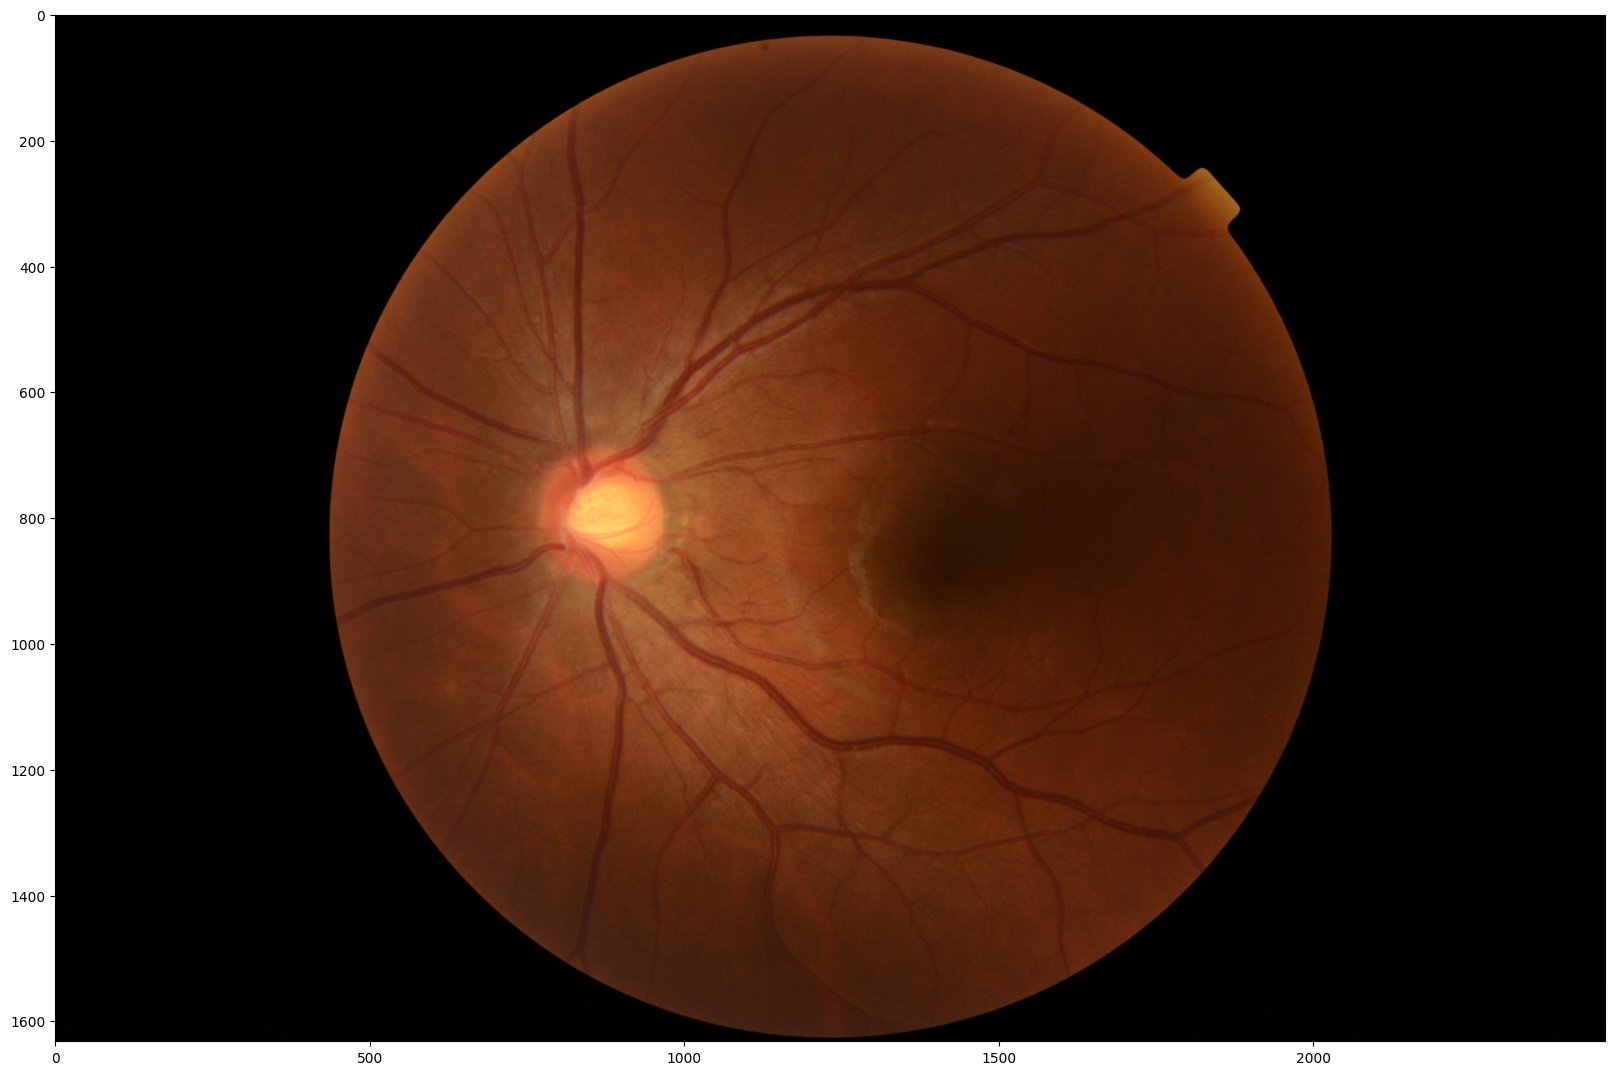

In [4]:
test_img = cv.imread('Catarac_Dataset/dataset/1_normal/NL_001.png')
test_img = cv.cvtColor(test_img, cv.COLOR_BGR2RGB)
show_image(test_img)

In [5]:
width, height, dimension = test_img.shape
print(f'Width RGB = {width}')
print(f'Height RGB = {height}')
print(f'Dimension RGB = {dimension}')

Width RGB = 1632
Height RGB = 2464
Dimension RGB = 3


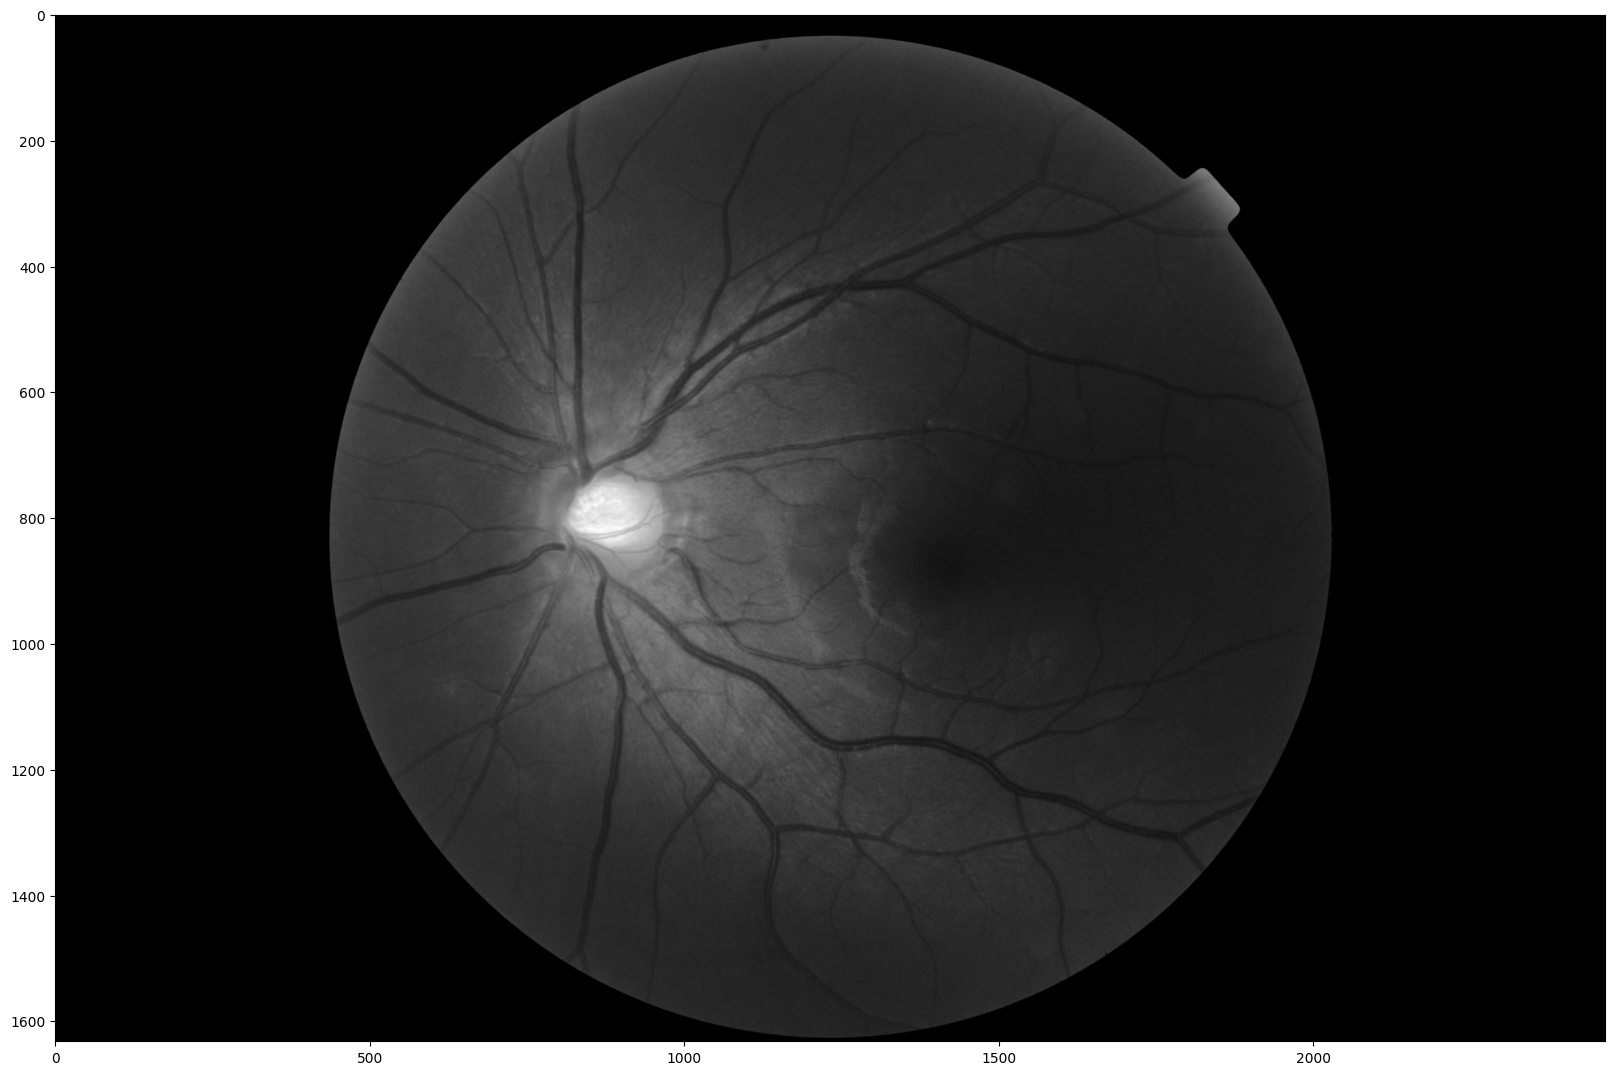

In [6]:
green_channel = test_img[:, :, 1]
show_image(green_channel)

In [7]:
width, height = green_channel.shape
print(f'Width Grayscale = {width}')
print(f'Height Grayscale = {height}')
print(f'Image Shape Grayscale {green_channel.shape}')

Width Grayscale = 1632
Height Grayscale = 2464
Image Shape Grayscale (1632, 2464)


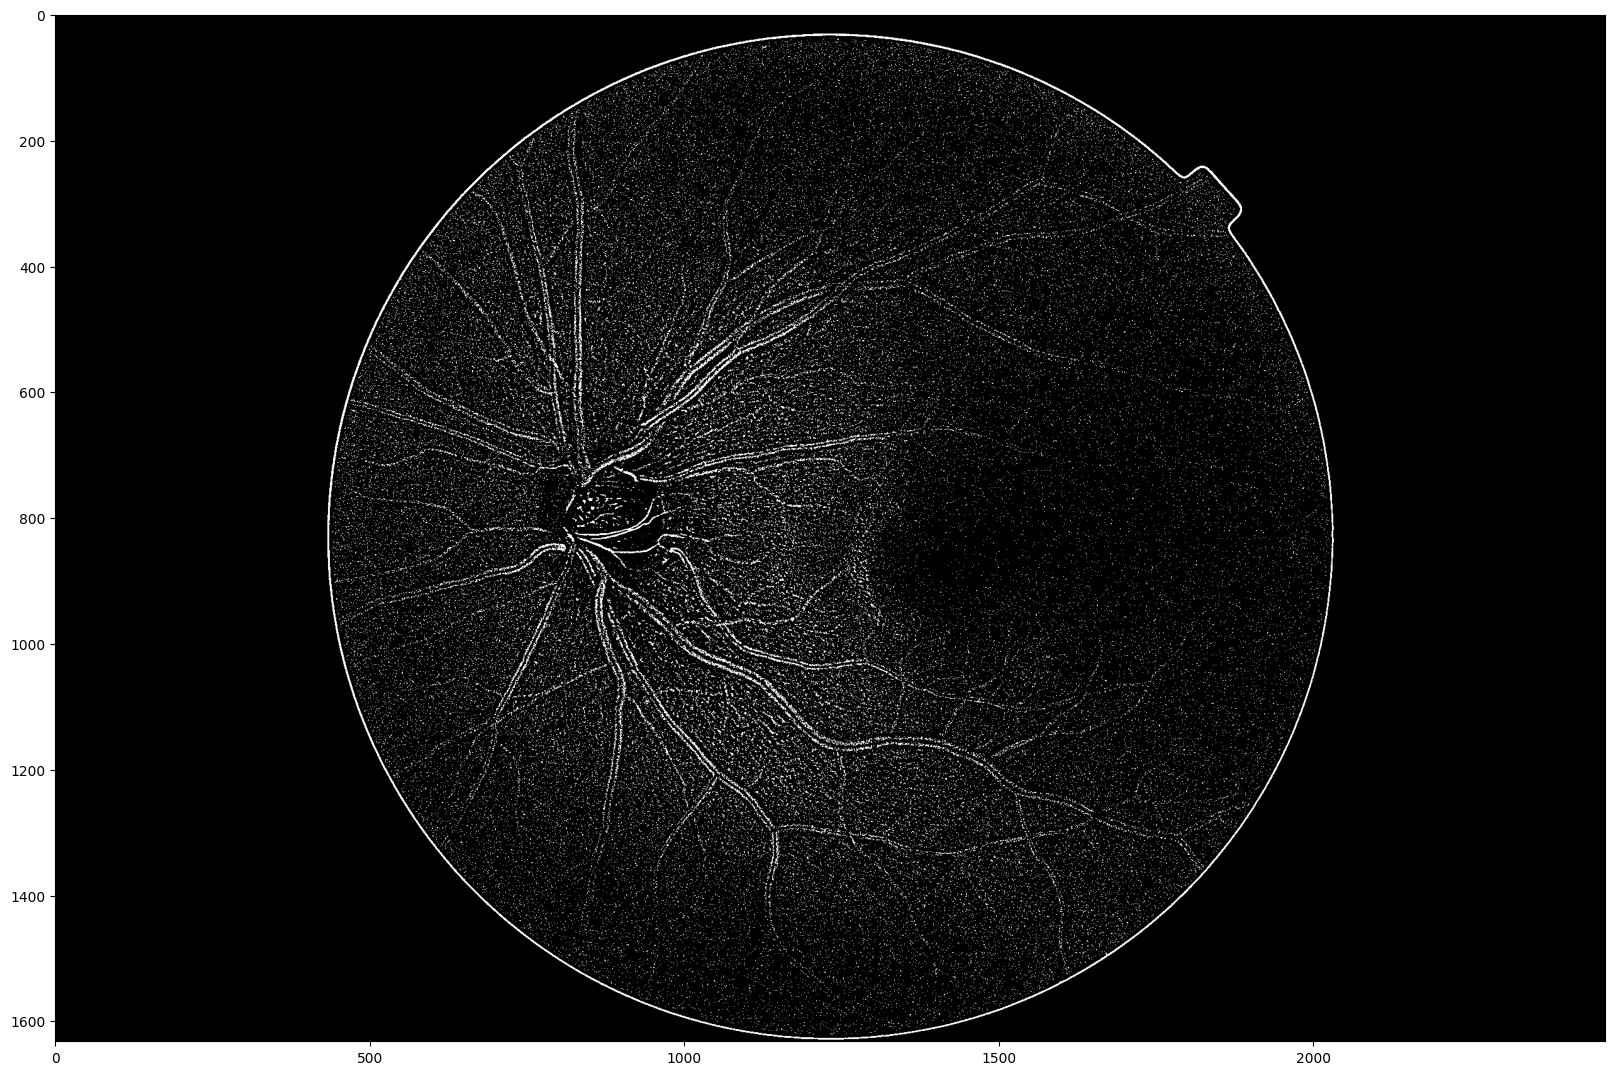

In [8]:
test_img_thresh = cv.adaptiveThreshold(green_channel,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,3)
show_image(test_img_thresh)

Text(0.5, 1.0, 'Final Output')

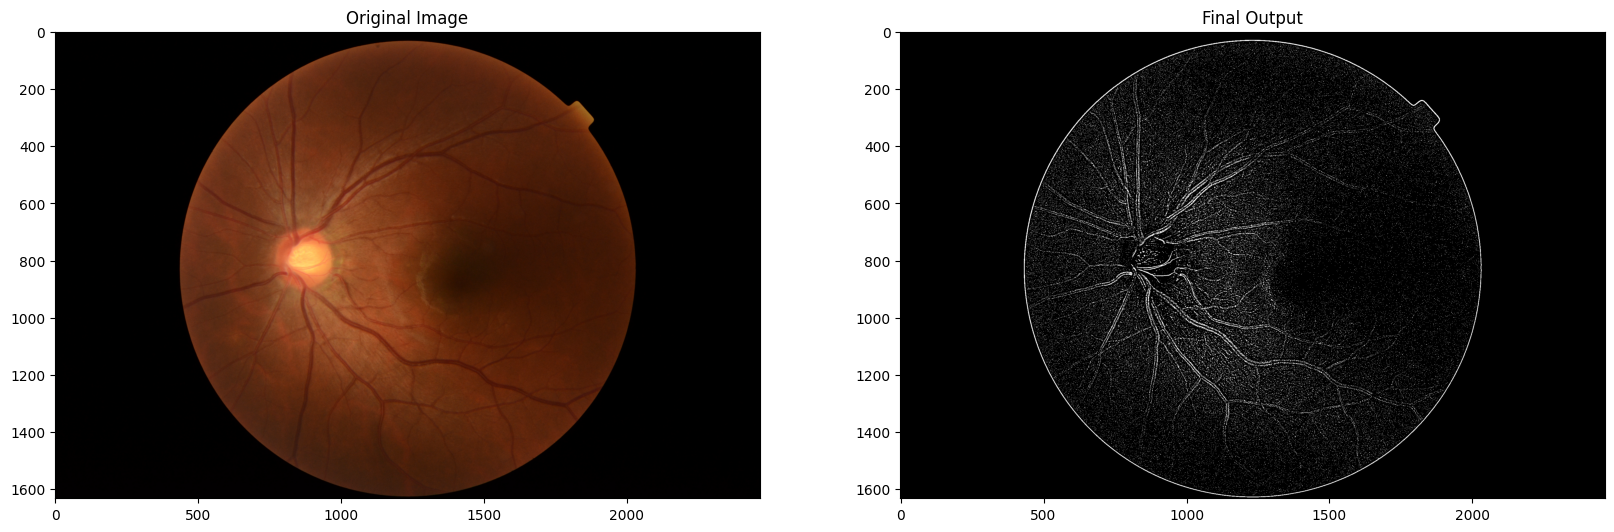

In [9]:
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 2, 1)
plt.imshow(test_img)
plt.title('Original Image')
fig.add_subplot(1, 2, 2)
plt.imshow(test_img_thresh,cmap='gray')
plt.title("Final Output")

Text(0.5, 1.0, 'Final Output')

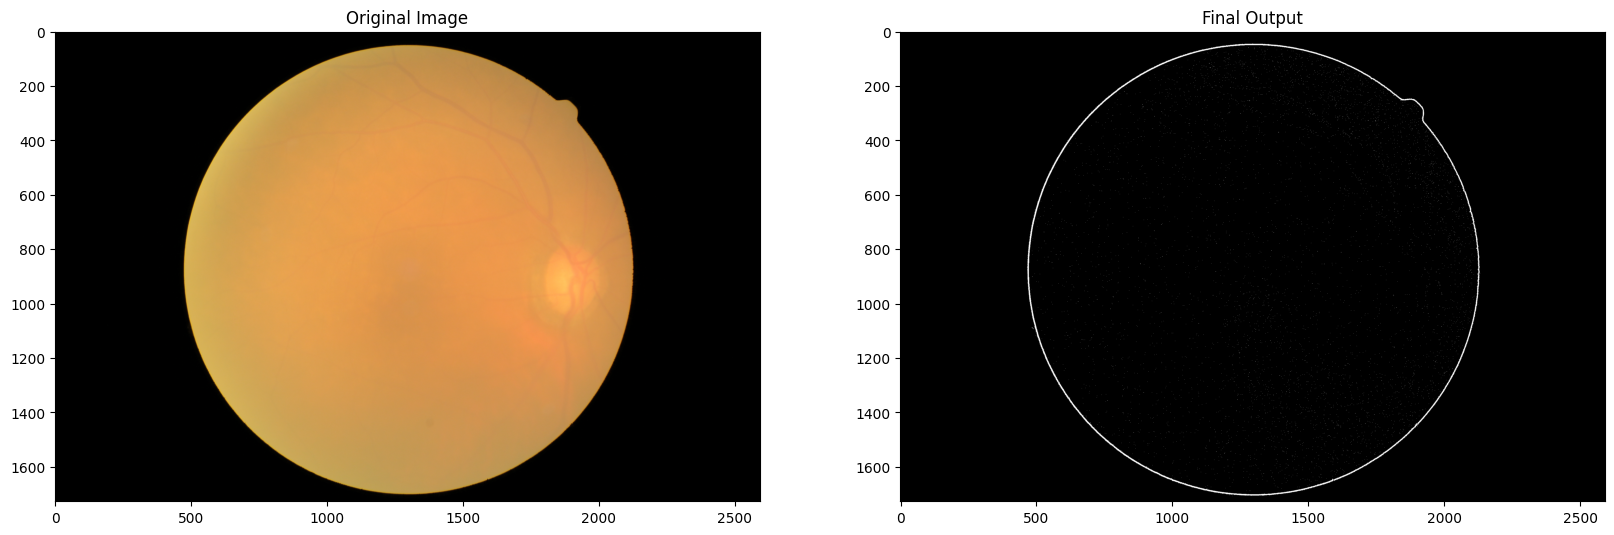

In [10]:
test_img1 = cv.imread('Catarac_Dataset/dataset/2_cataract/cataract_022.png')
test_img1 = cv.cvtColor(test_img1, cv.COLOR_BGR2RGB)
green_channel1 = test_img1[:, :, 1]
test_img_thresh1 = cv.adaptiveThreshold(green_channel1,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,3)
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 2, 1)
plt.imshow(test_img1)
plt.title('Original Image')
fig.add_subplot(1, 2, 2)
plt.imshow(test_img_thresh1,cmap='gray')
plt.title("Final Output")

In [12]:
def glcm_feature(matrix_coocurrence, featureName):
    feature = graycoprops(matrix_coocurrence, featureName)
    result = np.average(feature)
    return result

Preprocessing

In [15]:
def preprocessingImage(image):
    test_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    green_channel = test_img[:, :, 1]
    test_img_thresh = cv.adaptiveThreshold(green_channel,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,11,3)
    test_img_ROI_resize = cv.resize(test_img_thresh, (width, height))
    return test_img_thresh

In [14]:
file_normal = 301
file_cataract = 101
file_glaucoma = 102
file_retina = 101
width, height = 400, 400
distance = 10
teta = 90
data_eye = np.zeros((5, 601))
count = 0
indextable = ['contrast', 'homogenity', 'energy', 'correlation', 'Label']

normal_dataset_path = 'Catarac_Dataset/dataset/1_normal/'
cataract_dataset_path = 'Catarac_Dataset/dataset/2_cataract/'
glaucoma_dataset_path = 'Catarac_Dataset/dataset/2_glaucoma/'
retina_dataset_path = 'Catarac_Dataset/dataset/3_retina_disease/'

In [16]:
for file in range(1, file_normal):
    contrast = []
    homogeneity = []
    energy = []
    correlation = []
    label = 0
    image = cv.imread(f'{normal_dataset_path}/NL_{str(file).zfill(3)}.png')
    img = preprocessingImage(image)
    
    glcm = graycomatrix(img, [distance], [teta], levels=256, symmetric=True, normed=True)
    contrast.append(glcm_feature(glcm, 'contrast'))
    homogeneity.append(glcm_feature(glcm, 'homogeneity'))
    energy.append(glcm_feature(glcm, 'energy'))
    correlation.append(glcm_feature(glcm, 'correlation'))
    
    data_eye[0, count] = contrast[0]
    data_eye[1, count] = homogeneity[0]
    data_eye[2, count] = energy[0]
    data_eye[3, count] = correlation[0]
    data_eye[4, count] = label
    
    count += 1

In [17]:
for file in range(1, file_cataract):
    contrast = []
    homogeneity = []
    energy = []
    correlation = []
    label = 1
    image = cv.imread(f'{cataract_dataset_path}/cataract_{str(file).zfill(3)}.png')
    img = preprocessingImage(image)
    
    glcm = graycomatrix(img, [distance], [teta], levels=256, symmetric=True, normed=True)
    contrast.append(glcm_feature(glcm, 'contrast'))
    homogeneity.append(glcm_feature(glcm, 'homogeneity'))
    energy.append(glcm_feature(glcm, 'energy'))
    correlation.append(glcm_feature(glcm, 'correlation'))
    
    data_eye[0, count] = contrast[0]
    data_eye[1, count] = homogeneity[0]
    data_eye[2, count] = energy[0]
    data_eye[3, count] = correlation[0]
    data_eye[4, count] = label
    
    count += 1

In [18]:
df= pd.DataFrame(np.transpose(data_eye), columns = indextable)

In [19]:
df

contrast  homogenity    energy  correlation  Label
0    4745.353681    0.927024  0.924099     0.069050    0.0
1    6456.148731    0.900714  0.896502     0.070828    0.0
2    4159.545951    0.936033  0.934464     0.043840    0.0
3    4063.178959    0.937515  0.935722     0.050980    0.0
4    3200.230019    0.950785  0.948663     0.075692    0.0
..           ...         ...       ...          ...    ...
596     0.000000    0.000000  0.000000     0.000000    0.0
597     0.000000    0.000000  0.000000     0.000000    0.0
598     0.000000    0.000000  0.000000     0.000000    0.0
599     0.000000    0.000000  0.000000     0.000000    0.0
600     0.000000    0.000000  0.000000     0.000000    0.0

[601 rows x 5 columns]

In [20]:
df.to_csv('Adaptive_Thresholding_data.csv', index=False)

In [21]:
data = pd.read_csv('Adaptive_Thresholding_data.csv')

In [22]:
data = data.iloc[:400]

In [23]:
data.describe()

contrast  homogenity      energy  correlation       Label
count   400.000000  400.000000  400.000000   400.000000  400.000000
mean   3086.760467    0.952530    0.950788     0.063359    0.250000
std    1334.970387    0.020530    0.021458     0.016447    0.433555
min     787.618954    0.900211    0.894888     0.032041    0.000000
25%    1905.561082    0.936090    0.933393     0.050944    0.000000
50%    2910.830384    0.955236    0.953695     0.061799    0.000000
75%    4155.817301    0.970695    0.969893     0.071923    0.250000
max    6488.888186    0.987888    0.986946     0.143389    1.000000

In [24]:
from sklearn.preprocessing import StandardScaler
features = data.drop(['Label'], axis='columns')
features_scaler = StandardScaler()
features = features_scaler.fit_transform(features)
features

array([[ 1.24397542, -1.24397542, -1.24539673,  0.34646483],
       [ 2.52710318, -2.52710318, -2.53311612,  0.45469021],
       [ 0.80460885, -0.80460885, -0.76174557, -1.18820865],
       ...,
       [-1.2626114 ,  1.2626114 ,  1.25516821, -0.07369155],
       [-1.379275  ,  1.379275  ,  1.36236619,  0.88055532],
       [-0.99128795,  0.99128795,  0.99470888, -0.7539298 ]])

In [25]:
data_normalization = data.copy()
data_normalization[['contrast', 'homogenity', 'energy', 'correlation']] = features
data_normalization

contrast  homogenity    energy  correlation  Label
0    1.243975   -1.243975 -1.245397     0.346465    0.0
1    2.527103   -2.527103 -2.533116     0.454690    0.0
2    0.804609   -0.804609 -0.761746    -1.188209    0.0
3    0.732332   -0.732332 -0.703041    -0.753534    0.0
4    0.085104   -0.085104 -0.099184     0.750801    0.0
..        ...         ...       ...          ...    ...
395 -1.383572    1.383572  1.372305     0.230142    1.0
396 -1.281927    1.281927  1.269065     0.474474    1.0
397 -1.262611    1.262611  1.255168    -0.073692    1.0
398 -1.379275    1.379275  1.362366     0.880555    1.0
399 -0.991288    0.991288  0.994709    -0.753930    1.0

[400 rows x 5 columns]

In [26]:
data_normalization.describe()

contrast    homogenity        energy   correlation       Label
count  4.000000e+02  4.000000e+02  4.000000e+02  4.000000e+02  400.000000
mean  -3.552714e-16 -5.968559e-15  5.258016e-15 -3.552714e-17    0.250000
std    1.001252e+00  1.001252e+00  1.001252e+00  1.001252e+00    0.433555
min   -1.724398e+00 -2.551658e+00 -2.608390e+00 -1.906470e+00    0.000000
25%   -8.859213e-01 -8.018123e-01 -8.116880e-01 -7.557473e-01    0.000000
50%   -1.319508e-01  1.319508e-01  1.356478e-01 -9.495420e-02    0.000000
75%    8.018123e-01  8.859213e-01  8.914336e-01  5.213779e-01    0.250000
max    2.551658e+00  1.724398e+00  1.687166e+00  4.871948e+00    1.000000

In [27]:
x = data_normalization.drop(['Label'], axis='columns')
y = data_normalization.Label

Classification using Machine Learning Alghoritm

In [28]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

model_params = {
    'svm_rbf': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [0.1, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [2, 3, 4],
            'coef0': [0.0, 1.0, 2.0]
        }
    },
    'svm_linear': {
        'model': svm.SVC(kernel='linear'),
        'params': {
            'C': [0.1, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2']
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [0.1, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
            'penalty': ['l1', 'l2'],
            'max_iter': [100, 200, 300]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 10, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'adaboost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.001, 0.01, 0.1, 1.0]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 200],
            'learning_rate': [0.001, 0.01, 0.1, 1.0],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'xgboost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 200],
            'learning_rate': [0.001, 0.01, 0.1, 1.0],
            'max_depth': [3, 5, 7],
            'min_child_weight': [1, 5, 10],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }
}

In [29]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

c:\Users\Acer Nitro 5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Acer Nitro 5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Acer Nitro 5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

model  best_score  \
0              svm_rbf      0.8500   
1           svm_linear      0.8125   
2        random_forest      0.8650   
3  logistic_regression      0.8450   
4                  KNN      0.8625   
5        decision_tree      0.8600   
6             adaboost      0.8525   
7    gradient_boosting      0.8550   
8              xgboost      0.8700   

                                         best_params  
0  {'C': 10, 'coef0': 2.0, 'degree': 4, 'kernel':...  
1                                         {'C': 0.1}  
2  {'max_depth': None, 'max_features': 'auto', 'm...  
3       {'C': 0.1, 'max_iter': 100, 'penalty': 'l1'}  
4  {'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}  
5  {'criterion': 'gini', 'max_depth': 10, 'min_sa...  
6       {'learning_rate': 0.001, 'n_estimators': 50}  
7  {'learning_rate': 0.1, 'max_depth': 3, 'min_sa...  
8  {'colsample_bytree': 1.0, 'learning_rate': 0.1...

In [30]:
df_score.to_csv('Best_Param_adt.csv', index=False)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [32]:
model = svm.SVC(C=10, kernel='poly', degree=4, coef0=2.0)
model.fit(x_train,y_train)

SVC(C=10, coef0=2.0, degree=4, kernel='poly')

In [33]:
model.score(x_test,y_test)

0.85

Text(95.72222222222221, 0.5, 'Truth')

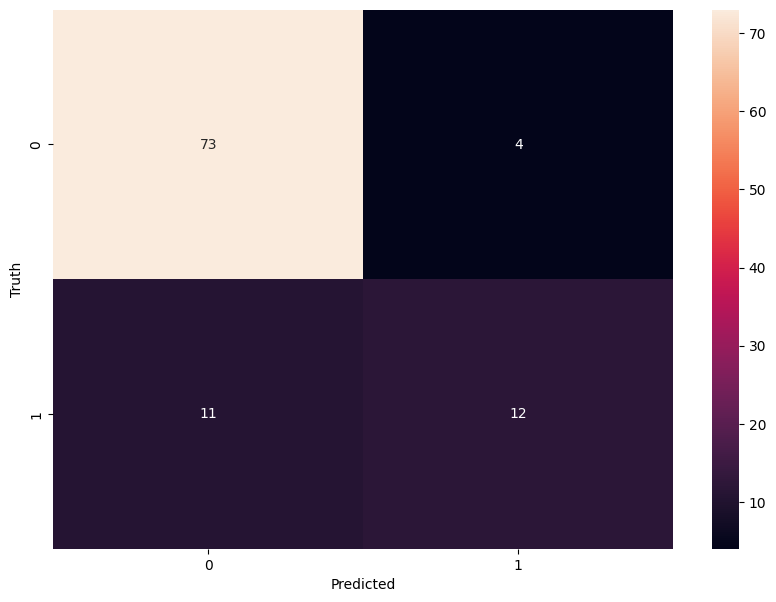

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
accuracy = accuracy_score(y_test, y_predicted)
print(f"Accuracy: {accuracy}")

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_predicted))

Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91        77
         1.0       0.75      0.52      0.62        23

    accuracy                           0.85       100
   macro avg       0.81      0.73      0.76       100
weighted avg       0.84      0.85      0.84       100



Random Forest

c:\Users\Acer Nitro 5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91        77
         1.0       0.75      0.52      0.62        23

    accuracy                           0.85       100
   macro avg       0.81      0.73      0.76       100
weighted avg       0.84      0.85      0.84       100



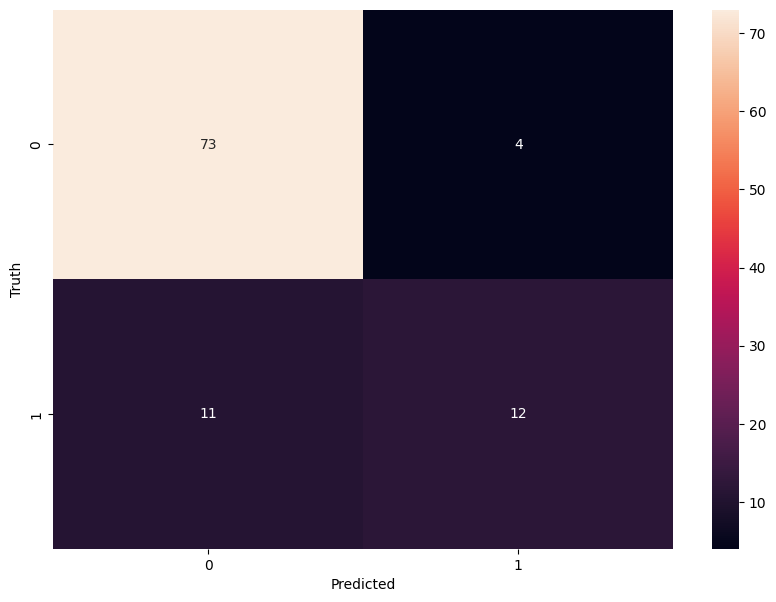

In [37]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(
    max_depth=None,
    max_features='auto',
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=20,
    random_state=42
)

rf_classifier.fit(x_train, y_train)

# Make predictions on the testing data
y_pred2 = rf_classifier.predict(x_test)
rf_classifier.score(x_test,y_test)

cm = confusion_matrix(y_test,y_pred2)
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))

logistic_regression

Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        77
         1.0       0.76      0.57      0.65        23

    accuracy                           0.86       100
   macro avg       0.82      0.76      0.78       100
weighted avg       0.85      0.86      0.85       100



Text(95.72222222222221, 0.5, 'Truth')

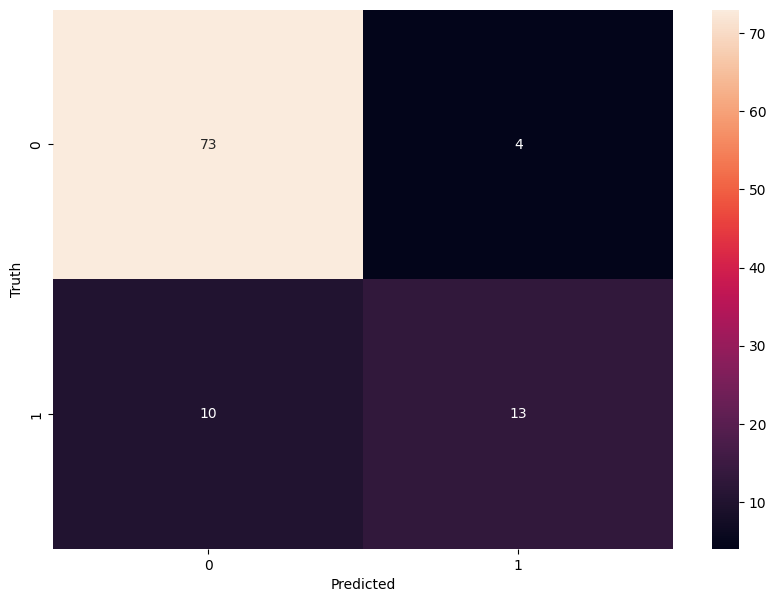

In [39]:
# Create a Logistic Regression model with adjusted C parameter
logistic_reg_model = LogisticRegression(
    C=0.1,
    max_iter=100,
    penalty='l1',
    solver='liblinear',
    random_state=42
)

# You can experiment with different values for C, such as 0.1, 1.0, 10.0, etc.

# Train the model on the training data
logistic_reg_model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred3 = logistic_reg_model.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy}")

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred3))

cm = confusion_matrix(y_test,y_pred3)
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

KNN

In [40]:
knn_classifier = KNeighborsClassifier(
    n_neighbors=10,
    p=2,
    weights='uniform'
)

# Train the classifier on the training data
knn_classifier.fit(x_train, y_train)

# Make predictions on the testing data
y_pred4 = knn_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy}")

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred4))

Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        77
         1.0       0.76      0.57      0.65        23

    accuracy                           0.86       100
   macro avg       0.82      0.76      0.78       100
weighted avg       0.85      0.86      0.85       100



Text(95.72222222222221, 0.5, 'Truth')

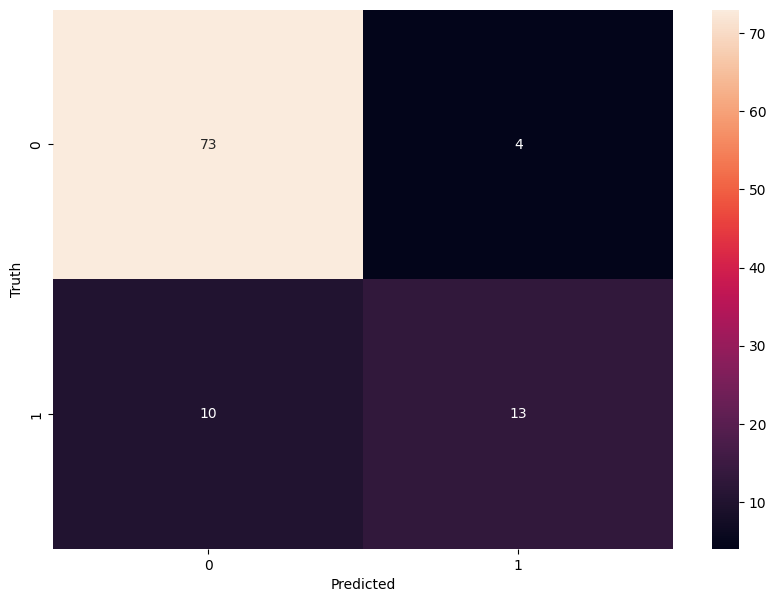

In [41]:
cm = confusion_matrix(y_test,y_pred4)
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Decision Tree

In [42]:
decision_tree_classifier = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=40,
    random_state=42
)

# Train the classifier on the training data
decision_tree_classifier.fit(x_train, y_train)

# Make predictions on the testing data
y_pred5 = decision_tree_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred5)
print(f"Accuracy: {accuracy}")

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred5))

Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        77
         1.0       0.80      0.70      0.74        23

    accuracy                           0.89       100
   macro avg       0.86      0.82      0.84       100
weighted avg       0.89      0.89      0.89       100



Text(95.72222222222221, 0.5, 'Truth')

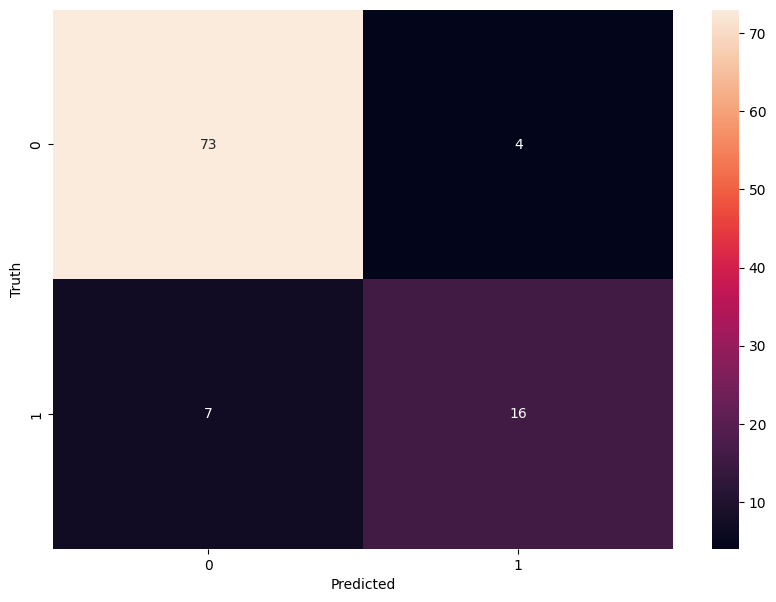

In [43]:
cm = confusion_matrix(y_test,y_pred5)
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Adaboost

Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        77
         1.0       0.79      0.65      0.71        23

    accuracy                           0.88       100
   macro avg       0.85      0.80      0.82       100
weighted avg       0.88      0.88      0.88       100



Text(95.72222222222221, 0.5, 'Truth')

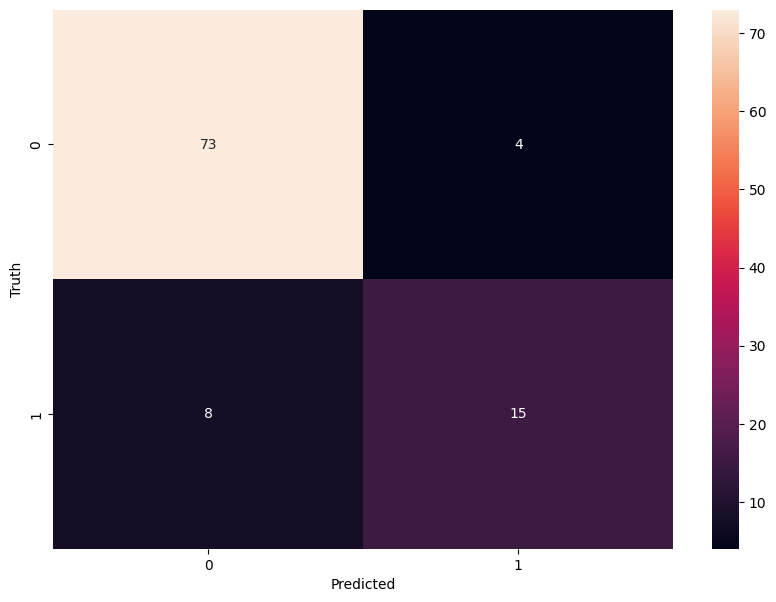

In [44]:
# Create an AdaBoost classifier with specified hyperparameters
adaboost_classifier = AdaBoostClassifier(
    learning_rate=0.001,
    n_estimators=50,
    random_state=42
)

# Train the classifier on the training data
adaboost_classifier.fit(x_train, y_train)

# Make predictions on the testing data
y_pred6 = adaboost_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred6)
print(f"Accuracy: {accuracy}")

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred6))
cm = confusion_matrix(y_test,y_pred6)
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Gradient Boosting

Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        77
         1.0       0.81      0.57      0.67        23

    accuracy                           0.87       100
   macro avg       0.85      0.76      0.79       100
weighted avg       0.87      0.87      0.86       100



Text(95.72222222222221, 0.5, 'Truth')

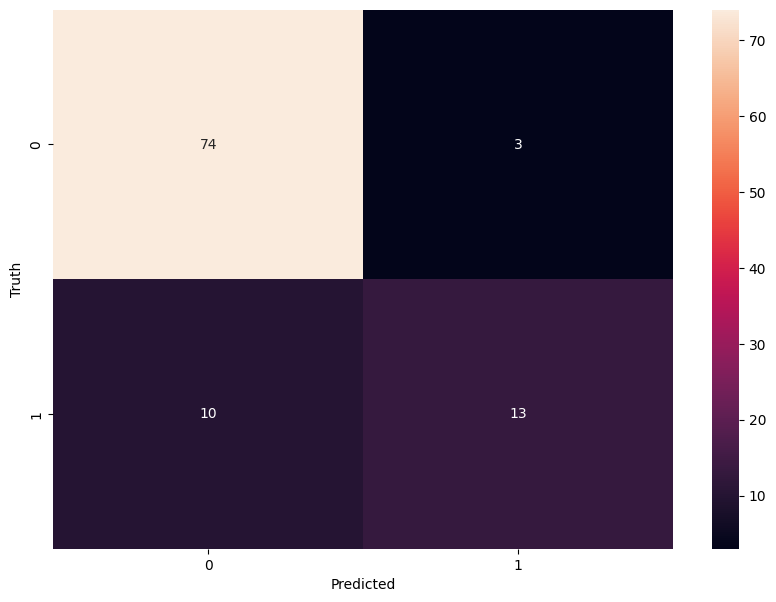

In [45]:
# Create a Gradient Boosting classifier with specified hyperparameters
gradient_boosting_classifier = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=10,
    random_state=42
)

# Train the classifier on the training data
gradient_boosting_classifier.fit(x_train, y_train)

# Make predictions on the testing data
y_pred7 = gradient_boosting_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred7)
print(f"Accuracy: {accuracy}")

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred7))

cm = confusion_matrix(y_test,y_pred7)
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

XGBoost

Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93        77
         1.0       0.83      0.65      0.73        23

    accuracy                           0.89       100
   macro avg       0.87      0.81      0.83       100
weighted avg       0.89      0.89      0.89       100



Text(95.72222222222221, 0.5, 'Truth')

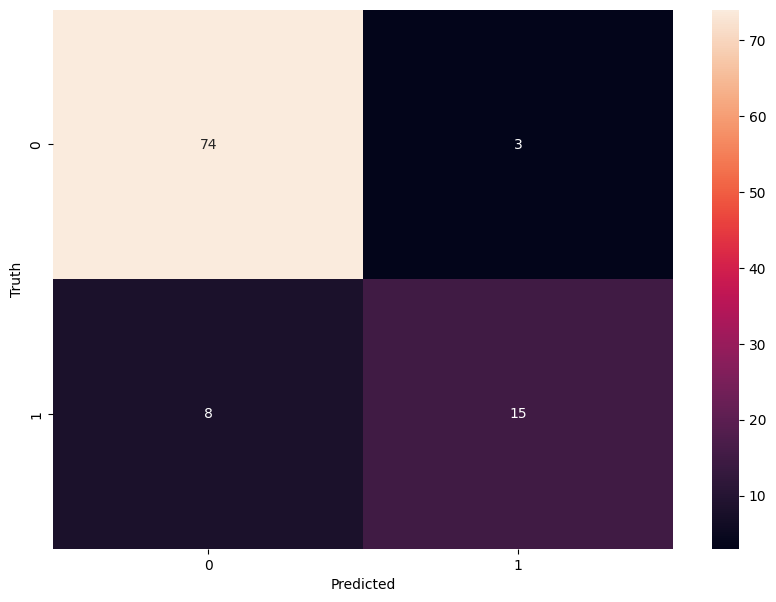

In [46]:
# Create an XGBoost classifier with specified hyperparameters
xgboost_classifier = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=5,
    n_estimators=45,
    subsample=1.0,
    random_state=42
)

# Train the classifier on the training data
xgboost_classifier.fit(x_train, y_train)

# Make predictions on the testing data
y_pred8 = xgboost_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred8)
print(f"Accuracy: {accuracy}")

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred8))

cm = confusion_matrix(y_test,y_pred8)
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Soft Voting

In [47]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create individual models with probability=True
model_svc = SVC(C=10, kernel='poly', degree=4, coef0=2.0, probability=True, random_state=42)
model_rf = RandomForestClassifier(max_depth=None, max_features='auto', min_samples_leaf=4, min_samples_split=10, n_estimators=20, random_state=42)
model_lr = LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='liblinear', random_state=42)
model_knn = KNeighborsClassifier(n_neighbors=10, p=2, weights='uniform')
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=4, min_samples_split=40, random_state=42)
model_ab = AdaBoostClassifier(learning_rate=0.001, n_estimators=50, random_state=42)
model_gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=42)
model_xgb = XGBClassifier(colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=45, subsample=1.0, random_state=42)

# Combine models in a soft voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', model_rf), ('svc', model_svc), ('lr', model_lr),
        ('knn', model_knn), ('dt', model_dt),
        ('ab', model_ab), ('gb', model_gb), ('xgb', model_xgb)
    ],
    voting='soft'
)

# Train the ensemble model
voting_clf.fit(x_train, y_train)

# Predict probabilities using predict_proba
proba_predictions = voting_clf.predict_proba(x_test)

# Select the class with the highest probability as the final prediction
y_pred9 = voting_clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred9)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


c:\Users\Acer Nitro 5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [48]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred9))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93        77
         1.0       0.83      0.65      0.73        23

    accuracy                           0.89       100
   macro avg       0.87      0.81      0.83       100
weighted avg       0.89      0.89      0.89       100



Text(37.25, 0.5, 'Truth')

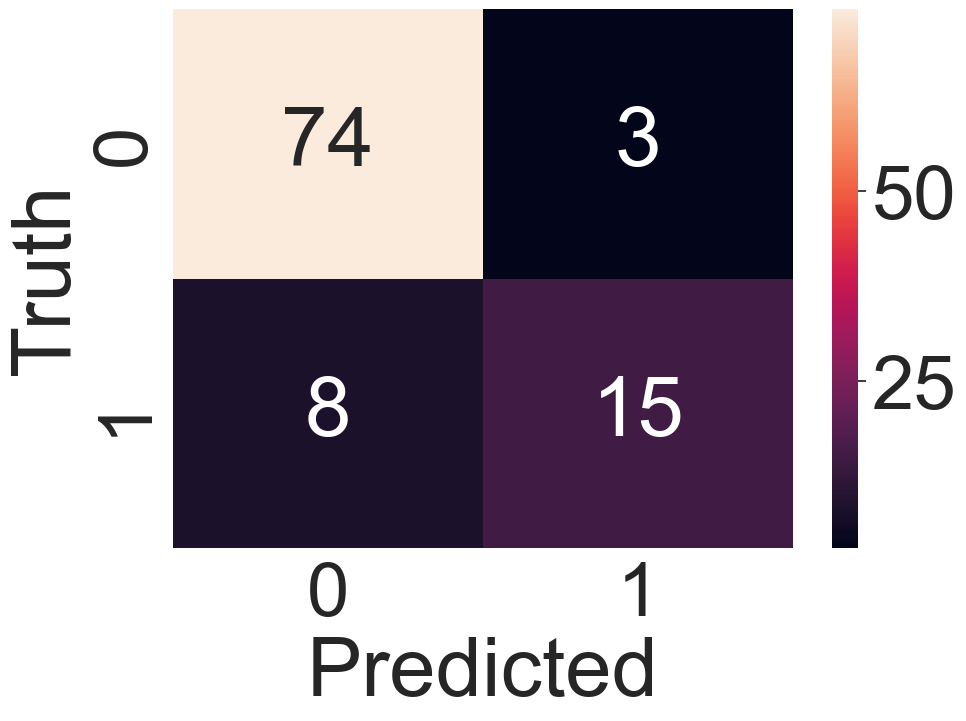

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

sb.set(font_scale=5)

cm = confusion_matrix(y_test,y_pred9)
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')